# TASK3:

## Augment the images provided in cat_dog.zip for

#### i) Rotation: create 72 images agains each single image for each 5 degree i.e., for 1.jpeg there should be 1_5degree.jpeg, 1_10degree.jpeg, 1_15degree.jpeg, ..., 1_350degree.jpeg and 1_355degree.jpeg (total 72 images) and 72 images for all other images too. There are 7 images in cat_dog.zip so the resultant folder should contain total 504 images.

#### ii) Brightness: change brightness to random level and create 5 images for each single image. Resultant directory should contain 7*5=35 images.

#### iii) Noise: add noise to create 5 images for each single image. Resultant directory should contain 7*5=35 images.

# 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Rotation

In [2]:
import os
os.getcwd()
os.chdir(r'C:\Users\uzair\Desktop\Computer Vision\cat_dog')
os.getcwd()

'C:\\Users\\uzair\\Desktop\\Computer Vision\\cat_dog'

### Different Rotation Techniques

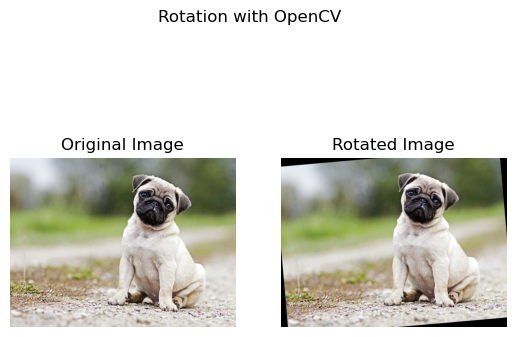

In [3]:
'''
    Rotation with opencv
'''

image = cv2.imread('1.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cols, rows = image.shape[:2]
M = cv2.getRotationMatrix2D((rows/2, cols/2), 5, 1)
rotated = cv2.warpAffine(image, M, (rows, cols))
cv2.destroyAllWindows()
plt.subplot(121)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.subplot(122)
plt.title("Rotated Image")
plt.imshow(rotated)
plt.axis('off')
plt.suptitle("Rotation with OpenCV")
plt.show()

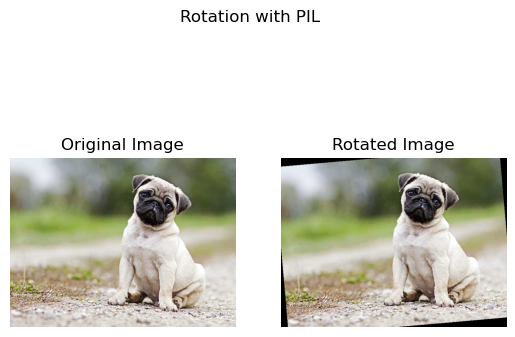

In [4]:
'''
    Rotation with PIL
'''

from PIL import Image 
img = Image.open("1.jpeg") 
rotate_img= img.rotate(5)
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")
plt.subplot(122)
plt.imshow(rotate_img)
plt.axis('off')
plt.title("Rotated Image")
plt.suptitle("Rotation with PIL")
plt.show()

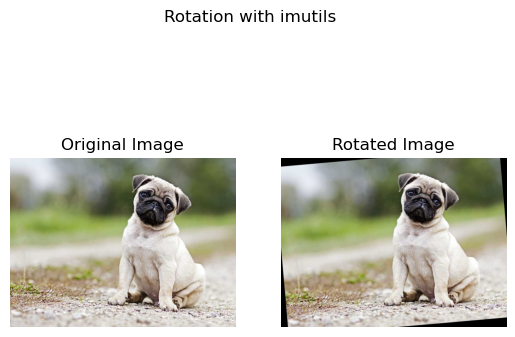

In [5]:
'''
    Rotation with imutils
'''

import imutils

image = cv2.imread('1.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
rot = imutils.rotate(image, angle=5)

plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")
plt.subplot(122)
plt.imshow(rot)
plt.axis('off')
plt.title("Rotated Image")
plt.suptitle("Rotation with imutils")
plt.show()

# 

## Creating Rotated Images

In [6]:
import os
os.getcwd()
os.chdir(r'C:\Users\uzair\Desktop\Computer Vision')
directory = os.listdir('cat_dog')
print(directory)

['1.jpeg', '2.jpeg', '3.jpeg', '4.jpeg', '5.jpeg', '6.jpeg', '7.jpeg', 'cat_dog_annotations.json', 'Data_Augmentation']


In [7]:
new_directory = directory[:-2]
print(new_directory)

['1.jpeg', '2.jpeg', '3.jpeg', '4.jpeg', '5.jpeg', '6.jpeg', '7.jpeg']


In [23]:
os.chdir(r'C:\Users\uzair\Desktop\Computer Vision\cat_dog')

if not os.path.exists('Data_Augmentation'):
    os.makedirs('Data_Augmentation')
    
os.chdir(r'C:\Users\uzair\Desktop\Computer Vision\cat_dog\Data_Augmentation')

if not os.path.exists('Rotated_Images' and 'Brightness' and 'Noise'):
    os.makedirs('Rotated_Images')
    os.makedirs('Brightness')
    os.makedirs('Noise')

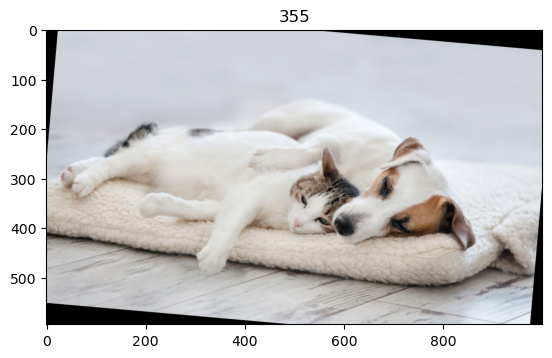

In [9]:
os.chdir(r'C:\Users\uzair\Desktop\Computer Vision\cat_dog')
   
for images in new_directory:
    image = cv2.imread(images)
    for i in range(72):
        angle = i * 5
        rotation = imutils.rotate(image, angle)
        filename = f"Data_Augmentation/Rotated_Images/{images.split('.')[0]}_{angle}degree.jpeg"
        cv2.imwrite(filename, rotation)
        rotation_rgb = cv2.cvtColor(rotation, cv2.COLOR_BGR2RGB)

# Showing last image with 355 rotation angle        
plt.imshow(rotation_rgb)
plt.title(angle)
plt.show()

## Adding Random Brightness

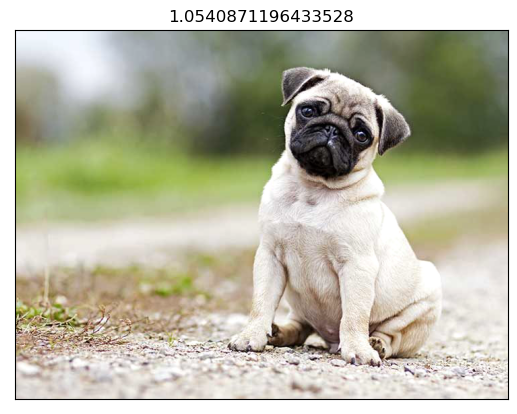

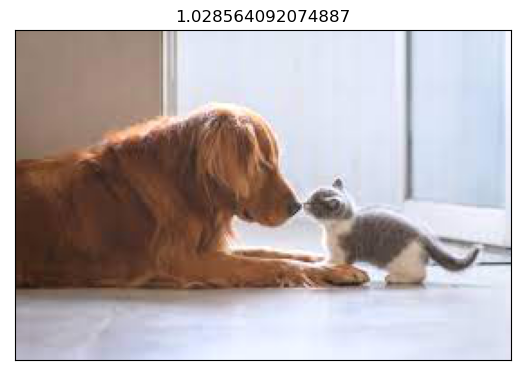

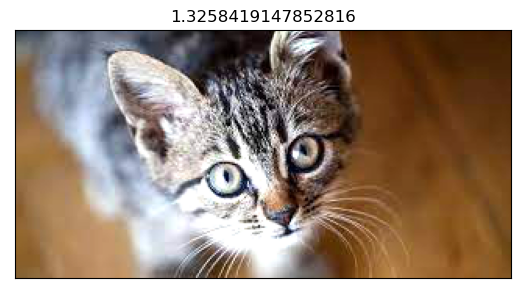

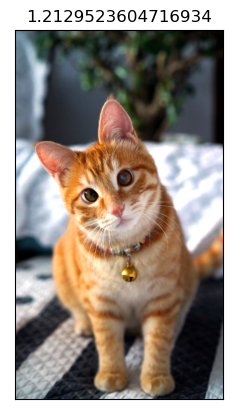

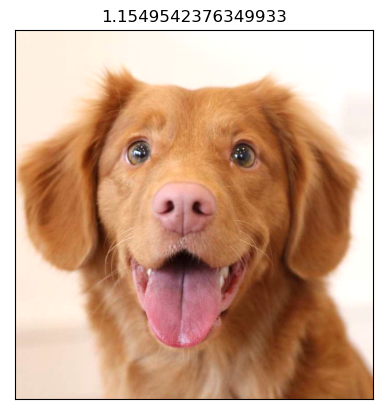

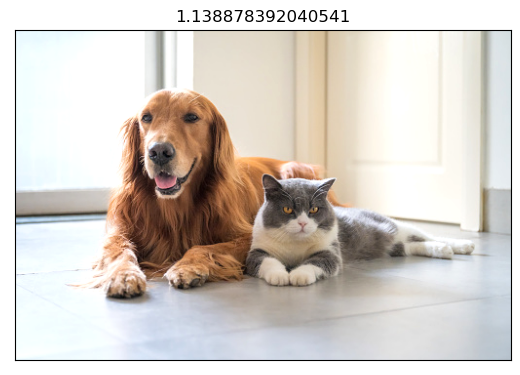

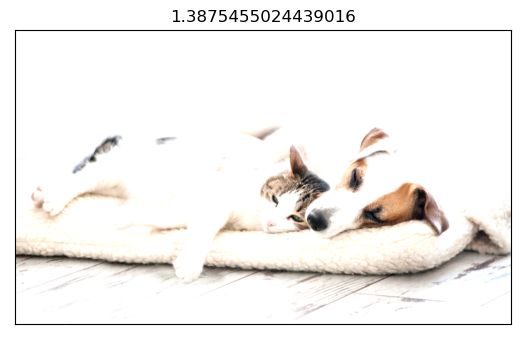

In [12]:
from PIL import Image, ImageEnhance
import random

os.chdir(r'C:\Users\uzair\Desktop\Computer Vision\cat_dog')
j = 1
for images in new_directory:
    image = Image.open(images)
    img_enhancer = ImageEnhance.Brightness(image)
    for i in range(5):
        # Randomly adjust brightness between 1.0 and 1.5
        brightness = random.uniform(1.0, 1.5)
        bright_img = img_enhancer.enhance(brightness)

        # Save the resultant image
        filename =f"Data_Augmentation/Brightness/{j}_{i+1}.jpeg"
        bright_img.save(filename)
        
     # Showing last brightened image from all images   
    plt.imshow(bright_img)
    plt.title(brightness)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    j += 1


# 

## Adding Random Noise

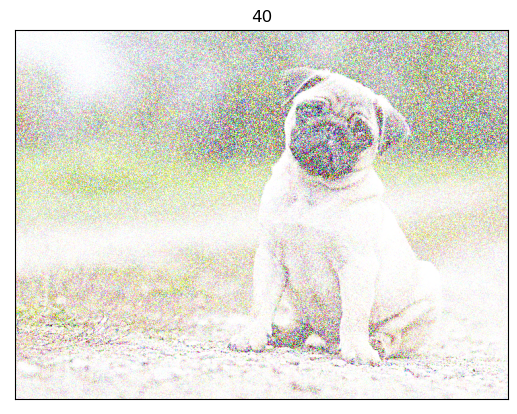

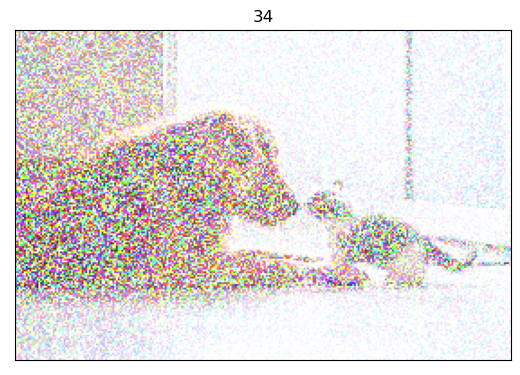

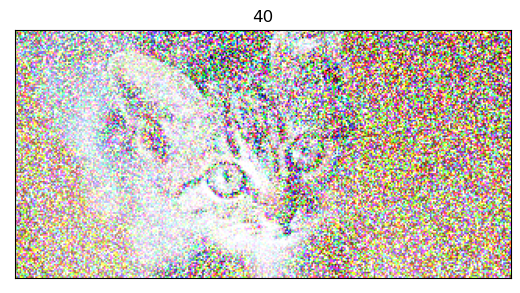

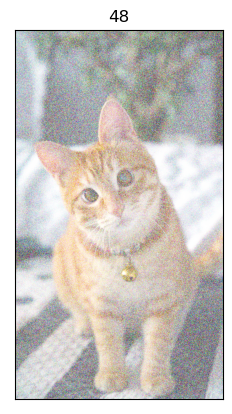

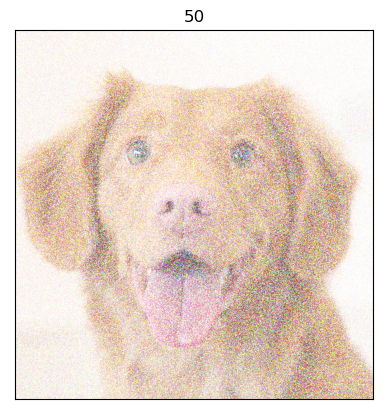

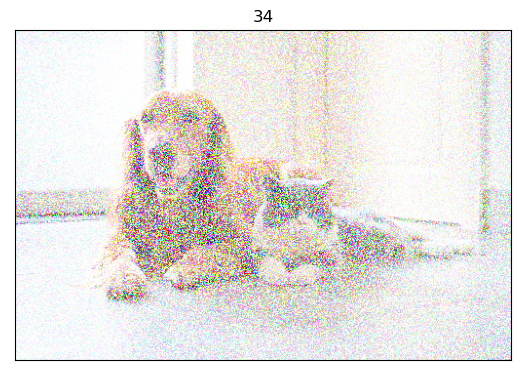

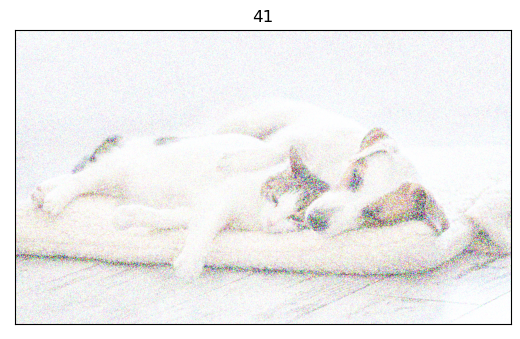

In [14]:
os.chdir(r'C:\Users\uzair\Desktop\Computer Vision\cat_dog')

j = 1
for images in new_directory:
    image = cv2.imread(images)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    shape = image_rgb.shape
    mean = 0
    for i in range(5):
        # Randomly adjust noise between 30 and 50
        sigma = random.randint(30, 50)
        gaussian_noise = np.random.normal(mean, sigma, shape)
        gaussian_img = cv2.add(image_rgb, gaussian_noise.astype(np.uint8))
        
        # Save the resultant image
        filename =f"Data_Augmentation/Noise/{j}_{i+1}.jpeg"
        cv2.imwrite(filename, gaussian_img)
    
    # Showing last noised image from all images
    plt.imshow(gaussian_img)
    plt.title(sigma)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    j += 1
  